# The law of arcsin in brownien motion

Brownien motion enjoys some properties that may violate intuition. If you think that on average, brownien motion will stay half of the time above y = 0 and half of the time below time of zero in an artbitrary time interval t start from 0 you might be surprised by what says the arcsinus law. 

This notebook simulates trajects of brownien motion, calculate how many time they spend above y=0. This can be denoted by a random variable $X = H(t)/t$ with $H(t)$ defined below. 

We check that $X$ is of cumulative function as $arcsin(\sqrt{u})$.

In [1]:
import numpy as np
import pandas as pd
from random import seed
from random import gauss

from scipy.stats import norm
import matplotlib.pyplot as plt
import math

$$H(t) = \int_0^t 1_{B(s) \geq 0}  ds $$

$$\mathbb{P}(H(t) \leq tu) = \frac{2}{\pi} \text{arcsin}(\sqrt{u}) $$

## Foward simulation for brownian motion

In [2]:
def MB(n, T = 1):
    """
    - simulate dW according to the accroissment of brownien motion
    - W is the cumsum, thus the traject of brownien motion
    """
    DeltaT = T/(2**n)
    dW = np.zeros(2**n + 1)
    dW[1:] = np.random.randn(2**n) * np.sqrt(DeltaT)
    W = np.cumsum(dW)
    return W

## Visualize 100 simulated browien motion trajects

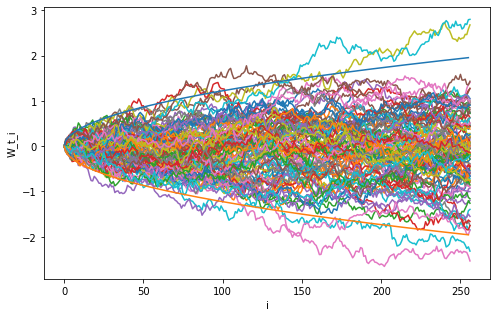

In [3]:
n = 8

plt.figure(figsize = (8,5))
for j in range(100):
    plt.plot(np.arange(2**n+1), MB(n), label = 'n='+str(n))
plt.xlabel('i')
plt.ylabel('W_t_i')

deltaT = np.array([1/2**n]*2**n)
integeritoN = np.arange(0,2**n)*deltaT

# 95% certain zone
plt.plot(np.arange(0,2**n), np.array([1.96]*2**n) *np.sqrt(integeritoN), label = "IC95%UP")
plt.plot(np.arange(0,2**n), -np.array([1.96]*2**n)*np.sqrt(integeritoN), label = "IC95%DOWN")
plt.show()

In [4]:
t = 10
N = 500
u = np.arange(0,1, 0.05)
Fu = []
for uu in u:
    tmp = []
    for k in range(N):
        trajet = MB(t)
        Ht = np.sum(trajet > 0)
        tmp.append(Ht/2**t)
    Fu.append(np.sum(np.array(tmp) <= uu)/N)

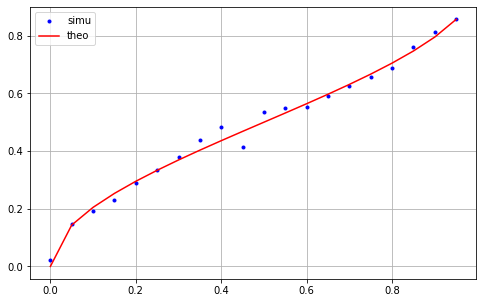

In [5]:
arcsinu = 2/np.pi*np.arcsin(np.sqrt(np.array(u)))

plt.figure(figsize = (8,5))

plt.plot(u,Fu,'b.', label = 'simu')
plt.plot(u,arcsinu, 'r-', label = 'theo')

plt.legend()
plt.grid()
plt.show()

$$\frac{d}{dx} arcsin(\sqrt{x}) = \frac{1}{\sqrt{1-x}}\frac{1}{\sqrt{x}}$$

## Density function of $arcsin(\sqrt{x})$

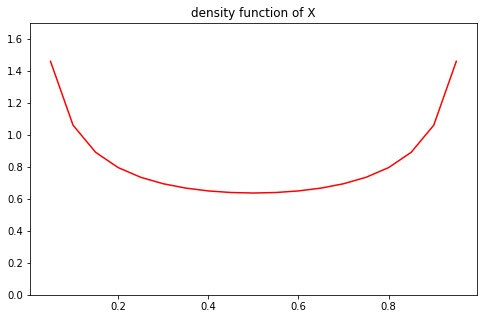

In [6]:
plt.figure(figsize = (8,5))

uu = u[1:]
darcsinu = 1/np.pi /np.sqrt((1-uu)*uu)
plt.plot(uu,darcsinu, 'r-', label = 'density')
plt.ylim(0,1.7)
plt.title('density function of X')
plt.show()

From the above density plot, we see that brownien motion has larger probability to stay always above or below y = 0.